

> Setup libraries & imports



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Import Dataset from tensorflow dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)



> Display one of the images and normalize it



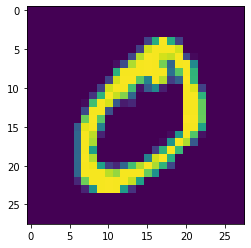

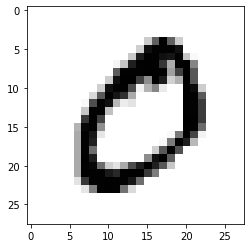

In [3]:
plt.imshow(x_train[1])
plt.show()

plt.imshow(x_train[1], cmap = plt.cm.binary)

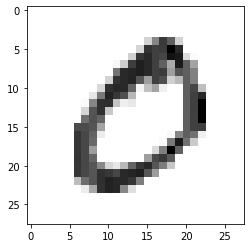

In [5]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[1], cmap = plt.cm.binary)

In [6]:
print(y_train[1])

0


# Train the model

In [7]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training sample dimension", x_trainr.shape)
print("Training sample dimension", x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Training sample dimension (10000, 28, 28, 1)


In [8]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [9]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ["accuracy"])

In [10]:
model.fit(x_trainr,y_train, epochs=5, validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 67s 50ms/step - loss: 0.3237 - accuracy: 0.9007 - val_loss: 0.1360 - val_accuracy: 0.9581
Epoch 2/5
1313/1313 [==============================] - 66s 50ms/step - loss: 0.1100 - accuracy: 0.9667 - val_loss: 0.0879 - val_accuracy: 0.9724
Epoch 3/5
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0734 - accuracy: 0.9775 - val_loss: 0.0835 - val_accuracy: 0.9742
Epoch 4/5
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0745 - val_accuracy: 0.9784
Epoch 5/5
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0675 - val_accuracy: 0.9788


In [11]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("test loss on 10000 test samples:", test_loss)
print("Validation accuracy on 10.000 test samples:", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0591 - accuracy: 0.9831
test loss on 10000 test samples: 0.059100549668073654
Validation accuracy on 10.000 test samples: 0.9830999970436096


# Save the model

In [13]:
OCRmodel = "/content/drive/MyDrive/Project/Dataset OCR/SavedmodelOCR1"
tf.saved_model.save(model, OCRmodel)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Dataset OCR/SavedmodelOCR1/assets




> Convert Model from saved model to Tflite



In [14]:
converter = tf.lite.TFLiteConverter.from_saved_model(OCRmodel) # path to the SavedModel directory
tflite_model = converter.convert()



> Save Tflite model (.tflite)



In [15]:
with open('/content/drive/MyDrive/Project/Dataset OCR/modelOCR1.tflite', 'wb') as f:
  f.write(tflite_model)

# Predict some number from internet and test the accuracy

In [16]:
predicions = model.predict([x_testr])

In [17]:
pip install gTTS



> import an image



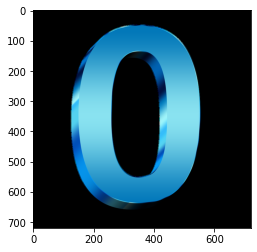

In [19]:
img = cv2.imread('0.png')
plt.imshow(img)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newimg = tf.keras.utils.normalize (resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predicions = model.predict(newimg)
hasil = np.argmax(predicions)
hasilstr = str(hasil)



> Prediction result



In [21]:
print(hasilstr)

0




> Perform text-to-speech



In [22]:
from gtts import gTTS
from IPython.display import Audio
tts = gTTS(hasilstr)
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)